# MODEL IMPLEMENTATION AND EVALUATION

This is the stage where the three models are built, optimized and evaluated.

Models used: `` Multinominal Naive Bayes`` , ``Support Vector Machine``, ``Logistic Regression``

Evaluation methods used: ``accuracy, precision, recall, f1_score`` and ``confusion matrix``

## Summary

After appropriate evaluation, LR with count vectorizer has been deemed the best. The rest of the models has all worked above 80% accuracy, with the other metrics working out above 79%. 

In [108]:
!pip install --upgrade scikit-learn

In [109]:


import sklearn
print(sklearn.__version__)

1.5.2


In [110]:
#LIBRARIES 
import warnings
warnings.simplefilter("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt


In [111]:
#lOADING DATASETS 
update_file_path = r"C:\Data_Science\Mini Project\Capston Project\Capston_IOD_Project\DATABASE files\updated_data.csv"
clear_file_path = r"C:\Data_Science\Mini Project\Capston Project\Capston_IOD_Project\DATABASE files\cleaned_data.csv"
# Try loading the CSV file with a different encoding

try:
    data = pd.read_csv(clear_file_path, encoding='ISO-8859-1')  # or use 'cp1252'
    review_data = pd.read_csv(update_file_path, encoding='ISO-8859-1')  # or use 'cp1252'
    #REMOVE MAX
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
except Exception as e:
    print("Error loading file:", e)
#DROP EXTRA COLUMNS
data.drop(['Unnamed: 0'], axis=1, inplace=True)
review_data.drop(['Unnamed: 0'], axis=1, inplace=True)

# DOUBLE-CHECKING...

Double checking if there are any NULL values within the dataset. This would cause issues later on if there are as such.

In [112]:
#CHECKING WHICH ROW IS NULL FROM PRE-PROCESSING
checkNULL = data.isnull()
checkNULL = checkNULL.any(axis=1)
data[checkNULL]

,review_text,verified_purchase
191,NaN,True
523,NaN,True
1072,NaN,True
1111,NaN,True
1230,NaN,True
1316,NaN,True


In [113]:
review_data = review_data.drop_duplicates().reset_index(drop=True)

In [114]:
review_data.head()

,review_rating,review_text,verified_purchase
0,5,"As you get older, you know what you like and w...",True
1,5,Three gigantic marmite jars that will last pro...,True
2,4,Excellent,True
3,5,A great flavour top - up for slow cooking.,True
4,5,Does what is says it does,False


In [115]:
print(review_data.shape) 

(1632, 3)


In [116]:
review_data.iloc[[191, 523, 1072, 1111, 1230, 1316], [1, 2]]

,review_text,verified_purchase
191,perfect,True
523,Smells divine ! Will definitely recommend !,True
1072,My the best choice. Fragrance is perfect and m...,False
1111,I love this body wash because it has such a su...,False
1230,good,False
1316,Thank god somebody delivers to Brazil!!! Makin...,True


In [117]:
#DROP THE NULL ROWS
data = data.dropna(how='any',axis=0) 

In [118]:
#UPDATED VP VALUES 
data["verified_purchase"].value_counts(normalize=True)

verified_purchase
False    0.525701
True     0.474299
Name: proportion, dtype: float64

# MODELING

Within the dataset, there are currently only two columns. Out of the two, review_text is going to be assigned as the input variable, and verified_purchases as the target variable. The data is then going to be split accordingly.

In [119]:
#SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    data['review_text'], data['verified_purchase'],test_size=0.4, random_state=42) #40% gives best results, 42 is no of life...

entiredf = format(data.shape[0])
traindf = format(X_train.shape[0])
testdf = format(X_test.shape[0])

print('Number of rows:')
print('Entire dataset:', entiredf)
print('Train dataset:', traindf)
print('Test dataset:',testdf)

Number of rows:
Entire dataset: 1712
Train dataset: 1027
Test dataset: 685


The data is decided to be split into 60 - 40, which has been determined by trial and error. This splitting produces the highest accuracy for the models, and thus we are going to with that. 

## COUNT VECTORIZER AND MODELING

word vectorization maps words or phrases from a lexicon to a matching vector of real numbers, which may then be used to determine word predictions and semantics, and this is done due to the fact that models only understand numerical data.

We are going to be utlizing two of the vectorization methods, the first one being count vectorizer. We just count the number of times a word appears in the document in CountVectorizer, which results in a bias in favor of the most common terms.

In [120]:
count_vectorizer  = CountVectorizer(stop_words='english')
count_vectorizer.fit(X_train)
print('\nVocabulary: \n', count_vectorizer.vocabulary_)

train_c = count_vectorizer.fit_transform(X_train)
test_c = count_vectorizer.transform(X_test)


Vocabulary: 
 {'current': 415, 'sell': 1501, 'price': 1312, 'compar': 343, 'supermarket': 1709, 'product': 1323, 'good': 762, 'smell': 1567, 'pleasant': 1272, 'need': 1136, 'add': 14, 'small': 1562, 'cloth': 321, 'fresh': 702, 'great': 778, 'moisturis': 1102, 'use': 1849, 'sensit': 1505, 'skin': 1550, 'love': 1011, 'pour': 1295, 'smaller': 1563, 'bottl': 194, 'make': 1034, 'manag': 1038, 'beat': 137, 'decent': 434, 'fabric': 616, 'soften': 1584, 'nice': 1144, 'fragranc': 697, 'purchas': 1337, 'deliveri': 458, 'cream': 399, 'handwash': 803, 'cheaper': 282, 'hand': 800, 'better': 155, 'liquid': 990, 'oh': 1176, 'wing': 1922, 'dove': 516, 'kitchen': 942, 'bathroom': 131, 'shower': 1530, 'room': 1439, 'recommend': 1381, 'highli': 832, 'star': 1640, 'simpl': 1540, 'gel': 729, 'like': 979, 'glue': 755, 'hard': 807, 'rub': 1447, 'slip': 1559, 'bath': 130, 'goe': 758, 'smoothli': 1573, 'easili': 541, 'wast': 1890, 'leav': 966, 'feel': 645, 'silki': 1538, 'soft': 1583, 'scenti': 1480, 'review'

## TFIDF VECTORIZER AND MODELING

We examine the total document weightage of a word in TfidfVectorizer. It assists us in coping with the most common terms. We may use it to penalize them. The word counts are weighted by a measure of how frequently they appear in the documents in TfidfVectorizer.

In [121]:
TFIDF_vectorizer  = TfidfVectorizer(stop_words='english')

TFIDF_vectorizer.fit(X_train)
print('\nVocabulary: \n', TFIDF_vectorizer.vocabulary_)

train_tf = TFIDF_vectorizer.fit_transform(X_train)
test_tf = TFIDF_vectorizer.transform(X_test)


Vocabulary: 
 {'current': 415, 'sell': 1501, 'price': 1312, 'compar': 343, 'supermarket': 1709, 'product': 1323, 'good': 762, 'smell': 1567, 'pleasant': 1272, 'need': 1136, 'add': 14, 'small': 1562, 'cloth': 321, 'fresh': 702, 'great': 778, 'moisturis': 1102, 'use': 1849, 'sensit': 1505, 'skin': 1550, 'love': 1011, 'pour': 1295, 'smaller': 1563, 'bottl': 194, 'make': 1034, 'manag': 1038, 'beat': 137, 'decent': 434, 'fabric': 616, 'soften': 1584, 'nice': 1144, 'fragranc': 697, 'purchas': 1337, 'deliveri': 458, 'cream': 399, 'handwash': 803, 'cheaper': 282, 'hand': 800, 'better': 155, 'liquid': 990, 'oh': 1176, 'wing': 1922, 'dove': 516, 'kitchen': 942, 'bathroom': 131, 'shower': 1530, 'room': 1439, 'recommend': 1381, 'highli': 832, 'star': 1640, 'simpl': 1540, 'gel': 729, 'like': 979, 'glue': 755, 'hard': 807, 'rub': 1447, 'slip': 1559, 'bath': 130, 'goe': 758, 'smoothli': 1573, 'easili': 541, 'wast': 1890, 'leav': 966, 'feel': 645, 'silki': 1538, 'soft': 1583, 'scenti': 1480, 'review'

Number of rows:
Entire dataset: 1712
Train dataset: 1027
Test dataset: 685

Results Summary:


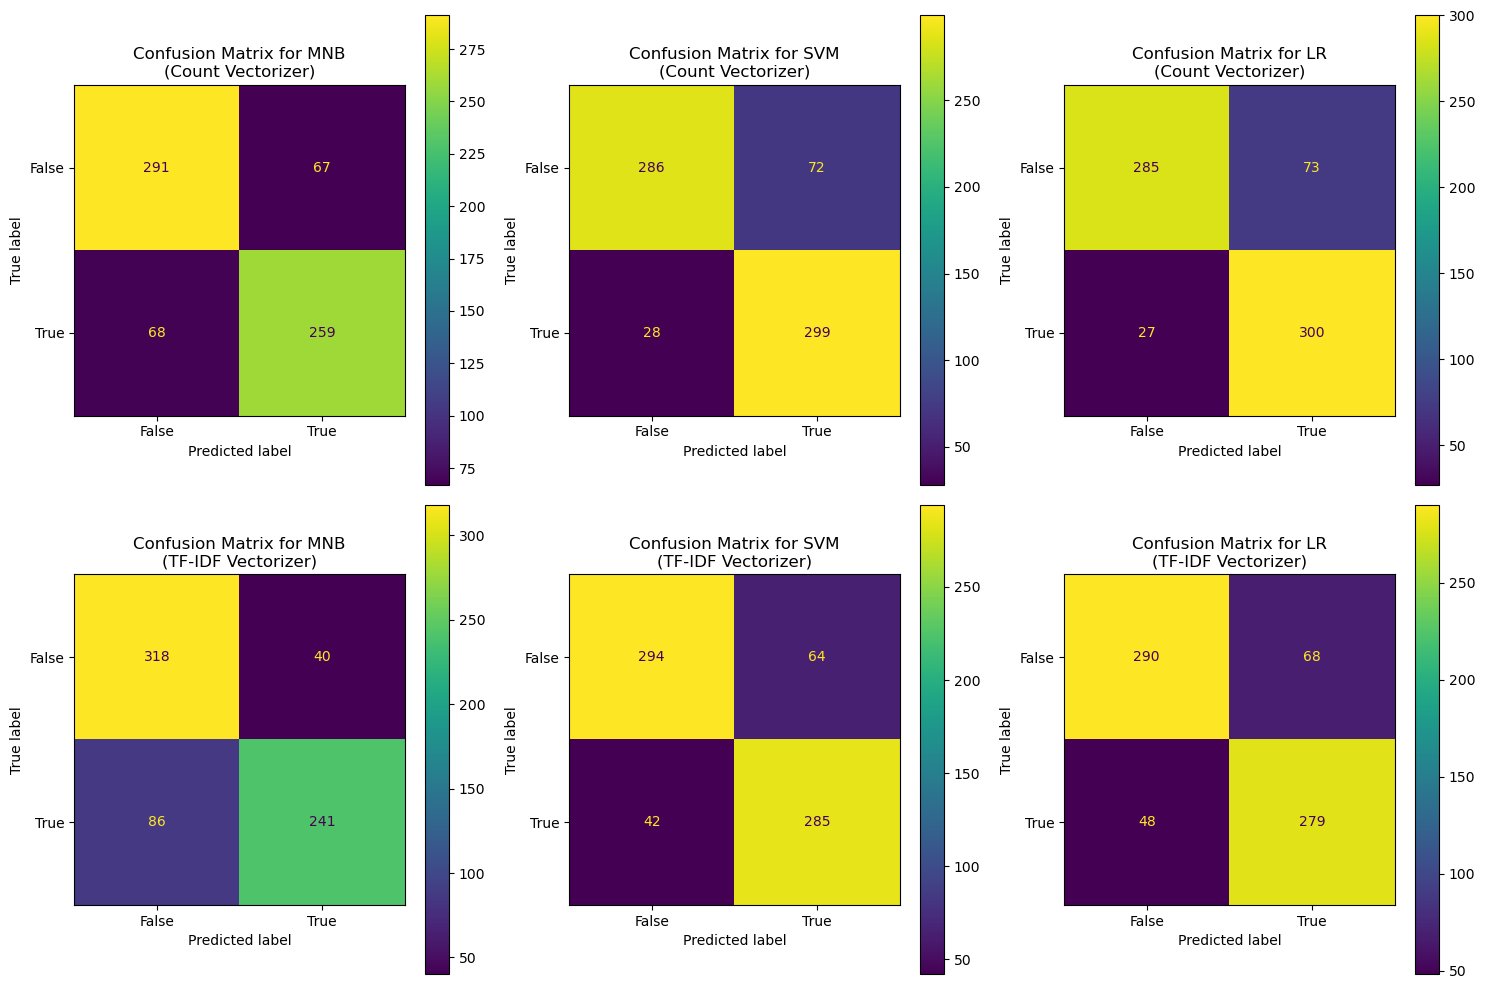

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, ConfusionMatrixDisplay)

# Load your dataset (adjust the file path as needed)
# df = pd.read_csv('path_to_your_dataset.csv')

# Assuming df is your DataFrame containing the data
X = data['review_text']  # Input variable (features)
y = data['verified_purchase']  # Target variable (labels)

# Split the data into training and testing sets (40% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Print the number of rows
print('Number of rows:')
print('Entire dataset:', len(data))
print('Train dataset:', len(X_train))
print('Test dataset:', len(X_test))

# Function to train and evaluate models
def evaluate_model(model, model_name, vectorizer_name, train_data, test_data, y_train, y_test, ax):
    model.fit(train_data, y_train)
    predictions = model.predict(test_data)

    accuracy = accuracy_score(y_test, predictions) * 100
    precision = precision_score(y_test, predictions) * 100
    recall = recall_score(y_test, predictions) * 100
    f1 = f1_score(y_test, predictions) * 100
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    display.plot(ax=ax)
    
    ax.set_title(f'Confusion Matrix for {model_name}\n({vectorizer_name})', fontsize=12)
    
    return accuracy, precision, recall, f1

# --- Count Vectorization ---
count_vectorizer = CountVectorizer(stop_words='english')
train_count = count_vectorizer.fit_transform(X_train)
test_count = count_vectorizer.transform(X_test)

# --- TF-IDF Vectorization ---
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
train_tfidf = tfidf_vectorizer.fit_transform(X_train)
test_tfidf = tfidf_vectorizer.transform(X_test)

# Models
models = {
    'MNB': MultinomialNB(),
    'SVM': SVC(),
    'LR': LogisticRegression(max_iter=1000)
}

# Initialize figure for subplots
fig, axs = plt.subplots(2, len(models), figsize=(15, 10))  # 2 rows, 3 columns

# Initialize lists to store results
results = []

# Evaluate models with Count Vectorizer
# print("Evaluating models with Count Vectorizer:")
for i, (name, model) in enumerate(models.items()):
    # print(f"\nModel: {name}")
    accuracy, precision, recall, f1 = evaluate_model(model, name, 'Count Vectorizer', train_count, test_count, y_train, y_test, axs[0, i])
    results.append([name, 'Count Vectorizer', accuracy, precision, recall, f1])

# Evaluate models with TF-IDF Vectorizer
# print("\nEvaluating models with TF-IDF Vectorizer:")
for i, (name, model) in enumerate(models.items()):
    # print(f"\nModel: {name}")
    accuracy, precision, recall, f1 = evaluate_model(model, name, 'TF-IDF Vectorizer', train_tfidf, test_tfidf, y_train, y_test, axs[1, i])
    results.append([name, 'TF-IDF Vectorizer', accuracy, precision, recall, f1])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Model', 'Vectorizer', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)'])

# Pivot the DataFrame to have Vectorizers as columns
pivot_df = results_df.pivot(index='Model', columns='Vectorizer', values=['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)'])
# Display the table
print("\nResults Summary:")
pivot_df

# Show all plots at once
plt.tight_layout()
plt.show()


In [123]:
pivot_df

Accuracy (%)                      Precision (%)  \
Vectorizer Count Vectorizer TF-IDF Vectorizer Count Vectorizer   
Model                                                            
LR                85.401460         83.065693        80.428954   
MNB               80.291971         81.605839        79.447853   
SVM               85.401460         84.525547        80.592992   

                                   Recall (%)                    \
Vectorizer TF-IDF Vectorizer Count Vectorizer TF-IDF Vectorizer   
Model                                                             
LR                 80.403458        91.743119         85.321101   
MNB                85.765125        79.204893         73.700306   
SVM                81.661891        91.437309         87.155963   

               F1 Score (%)                    
Vectorizer Count Vectorizer TF-IDF Vectorizer  
Model                                          
LR                85.714286         82.789318  
MNB               79.326187         79.276316  
SVM               85.673352         84.319527

# Insights
1. Logistic Regression (LR) performs best in terms of accuracy (84.96%) with Count Vectorizer, but TF-IDF provides lower scores across the board.
2. Multinomial Naive Bayes (MNB) shows a balanced performance with TF-IDF, especially in precision (85.16%).
3. Support Vector Machine (SVM) achieves the highest accuracy with TF-IDF (84.67%), indicating it might be better suited for this feature extraction method.
# Recommendations
>For tasks emphasizing recall, LR with Count Vectorizer is strong.

>If precision is critical, consider MNB with TF-IDF.

>Overall, SVM with TF-IDF is a robust choice for a balanced approach.